# Variables vs Tournament Outcomes V2
Looks at how previous variables compare with tournament outcomes

In [1]:
#Import Packages
import pandas as pd
import numpy as np
import os, sys
import random

#Import other files
raw_path = os.path.join('..', 'data', 'raw')
proc_path = os.path.join('..', 'data', 'processed')
sys.path.append(os.path.join('..', 'src'))
from viz.Correl import *
from model.Scoring import *
%matplotlib inline  
%load_ext autoreload
%autoreload 2

//anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
# Reads in data
seeds = pd.read_csv(os.path.join(raw_path, 'TourneySeeds.csv'))
slots = pd.read_csv(os.path.join(raw_path, 'TourneySlots.csv'))
results = pd.read_csv(os.path.join(raw_path, 'TourneyCompactResults.csv'))
features_v2 = pd.read_csv(os.path.join(proc_path, 'team_features_v2.csv'))

slots = slots[slots['Season']>2003]
seeds = seeds[seeds['Season']>2003]
results = results[results['Season']>2003]

In [3]:
#With these features, making a scoring set
scorer_v2 = Scorer(features_v2)
ss_v2 = scorer_v2.make_ss(results)

#Creates target variable for games
ss_v2['Outcome'] = ss_v2['Wscore'] - ss_v2['Lscore']
ss_v2 = ss_v2[ss_v2['Season']>2003]
ss_v2 = ss_v2.drop(['Lscore', 'Wscore', 'Season'], 1)

#Outputs outcome data
ss_v2.to_csv(os.path.join(proc_path, 'scoring_set_v2.csv'), index=False)

In [4]:
ss_v2.columns

Index([u'Clutch_A', u'Clutch_B', u'SOS_A', u'SOS_B', u'Team_A', u'Team_B',
       u'WinPct_A', u'WinPct_B', u'clstr_0_A', u'clstr_0_B', u'clstr_1_A',
       u'clstr_1_B', u'clstr_2_A', u'clstr_2_B', u'd3P_A', u'd3P_B', u'deff_A',
       u'deff_B', u'home_adv_A', u'home_adv_B', u'o3P_A', u'o3P_B', u'oeff_A',
       u'oeff_B', u'poss_stdev_A', u'poss_stdev_B', u'total_poss_A',
       u'total_poss_B', u'Outcome'],
      dtype='object')

         clstr_0_A  clstr_0_B  clstr_1_A  clstr_1_B  clstr_2_A  clstr_2_B
Outcome  -0.115352   0.085855   0.008351   0.076264   0.055606  -0.122776


//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


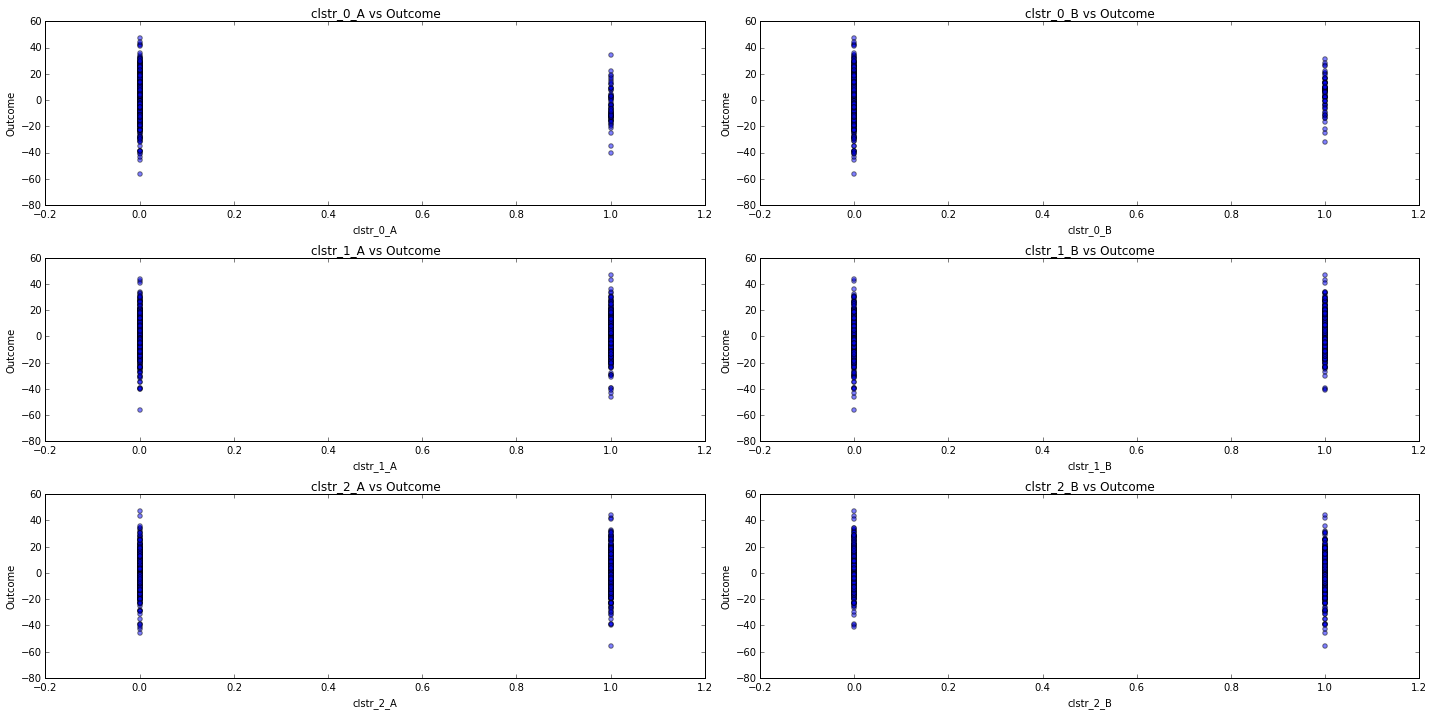

In [5]:
#Creates correlation charts for each variable
create_correl_charts(ss_v2, 'Outcome', ['clstr_0_A', 'clstr_0_B', 'clstr_1_A', 'clstr_1_B', 'clstr_2_A', 'clstr_2_B'])